## Statistical Analysis of the Cleaned Dataset

Statistical analysis helps us understand the key characteristics of the dataset, such as central tendency, variability, and relationships between variables. In this section, we will perform the following analyses on the cleaned dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the processed data
data_path = '../data/imdb_top_movies_cleaned.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()

,title,year,rating,genre,directors,revenue,lead_actors
0,The Shawshank Redemption,1994,9.3,"Epic, Period Drama, Prison Drama, Drama","Bob Gunton, Frank Darabont, Morgan Freeman, Ti...",29332133,"Bob Gunton, Tim Robbins, Morgan Freeman"
1,The Godfather,1972,9.2,"Epic, Gangster, Tragedy, Crime, Drama","Al Pacino, Marlon Brando, Mario Puzo, Peter Cl...",250342198,"Al Pacino, Marlon Brando, James Caan"
2,The Dark Knight,2008,9.0,"Action Epic, Epic, Superhero, Tragedy, Action,...","Salvatore Maroni, Michael Caine, Christian Bal...",1009057329,"Christian Bale, Aaron Eckhart, Heath Ledger"
3,The Godfather Part II,1974,9.0,"Epic, Gangster, Tragedy, Crime, Drama","Livio Giorgi, Al Pacino, Mario Puzo, Francis F...",47964222,"Al Pacino, Robert De Niro, Robert Duvall"
4,12 Angry Men,1957,9.0,"Legal Drama, Psychological Drama, Crime, Drama","Jack Warden, Lee J. Cobb, Sidney Lumet, Regina...",2945,"Henry Fonda, Martin Balsam, Lee J. Cobb"


### Descriptive Statistics
We will calculate basic descriptive statistics for the numeric columns, such as:
- Mean
- Median
- Standard Deviation
- Minimum and Maximum values

In [3]:
# Descriptive statistics for numeric columns
print(df.describe())

              year     rating       revenue
count   250.000000  250.00000  2.500000e+02
mean   1988.432000    8.31000  2.260349e+08
std      25.601153    0.23237  3.692036e+08
min    1921.000000    8.00000  0.000000e+00
25%    1972.250000    8.10000  5.749120e+06
50%    1995.000000    8.20000  5.846978e+07
75%    2009.000000    8.40000  3.202934e+08
max    2024.000000    9.30000  2.799439e+09


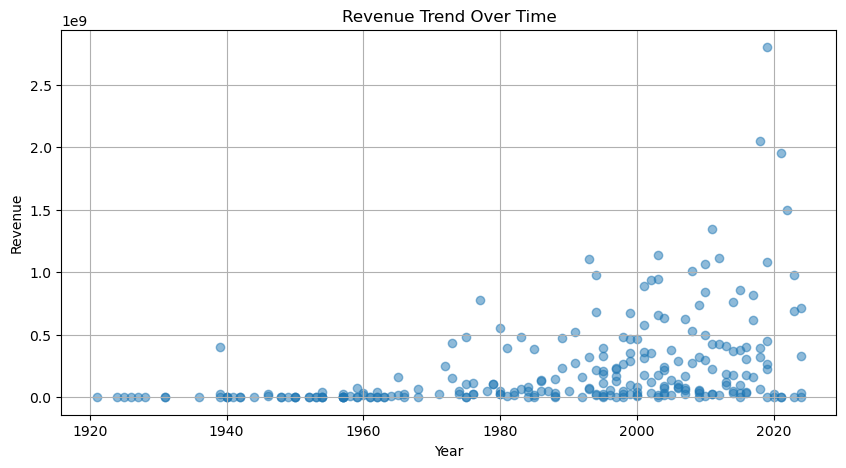

In [8]:
# ## Trends Analysis
# Scatter plot for Revenue over Year
plt.figure(figsize=(10, 5))
plt.scatter(df["year"], df["revenue"], alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.title("Revenue Trend Over Time")
plt.grid(True)
plt.show()


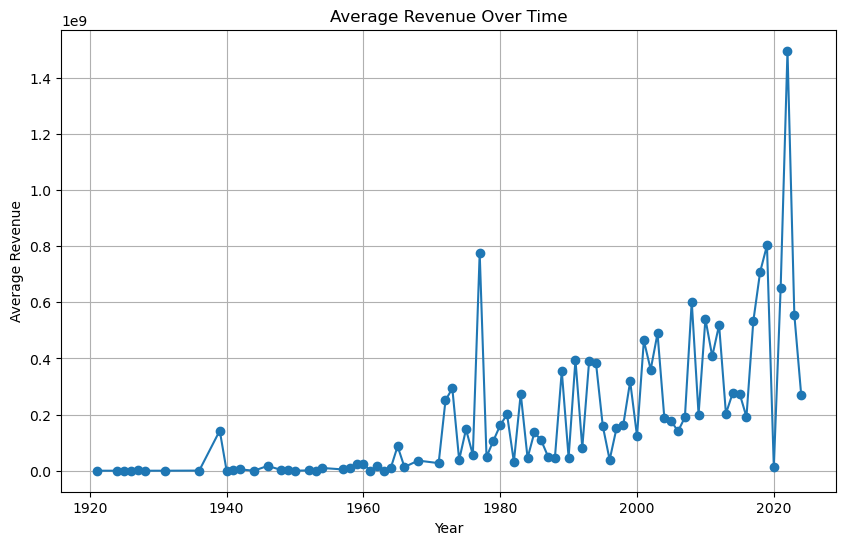

In [27]:
# Group by year and calculate average revenue
revenue_over_time = df.groupby('year')['revenue'].mean()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(revenue_over_time.index, revenue_over_time.values, marker='o')
plt.title('Average Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.grid(True)
plt.show()

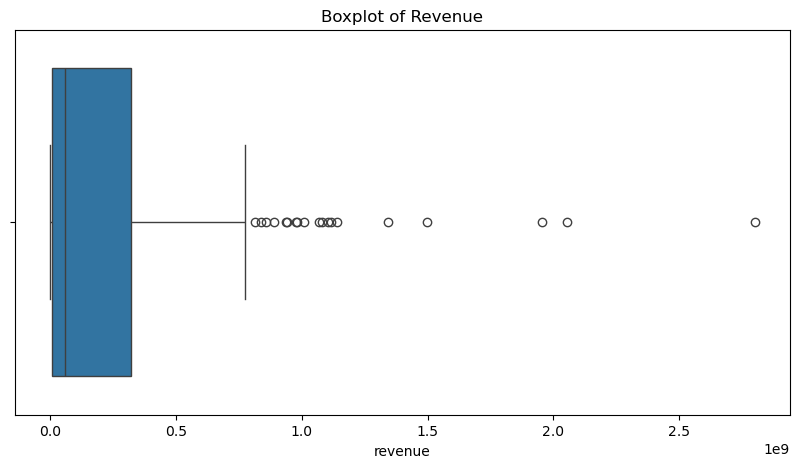

In [30]:
# Boxplot for Revenue
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["revenue"])
plt.title("Boxplot of Revenue")
plt.show()


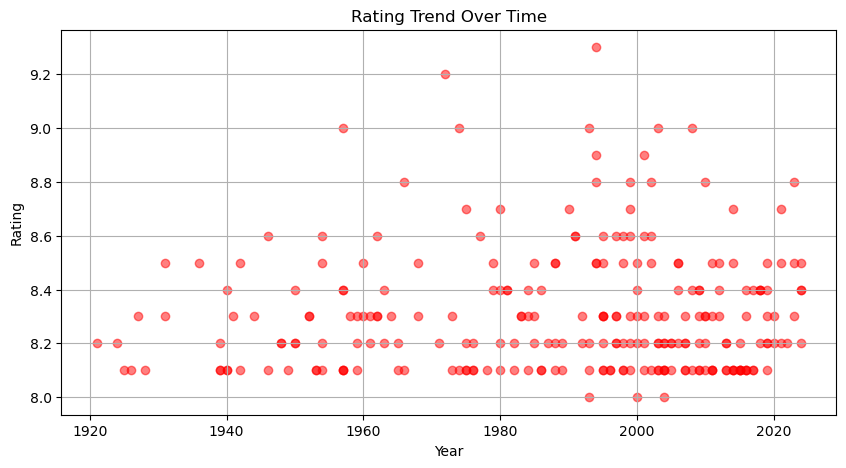

In [9]:
# Scatter plot for Rating over Year
plt.figure(figsize=(10, 5))
plt.scatter(df["year"], df["rating"], alpha=0.5, color='red')
plt.xlabel("Year")
plt.ylabel("Rating")
plt.title("Rating Trend Over Time")
plt.grid(True)
plt.show()

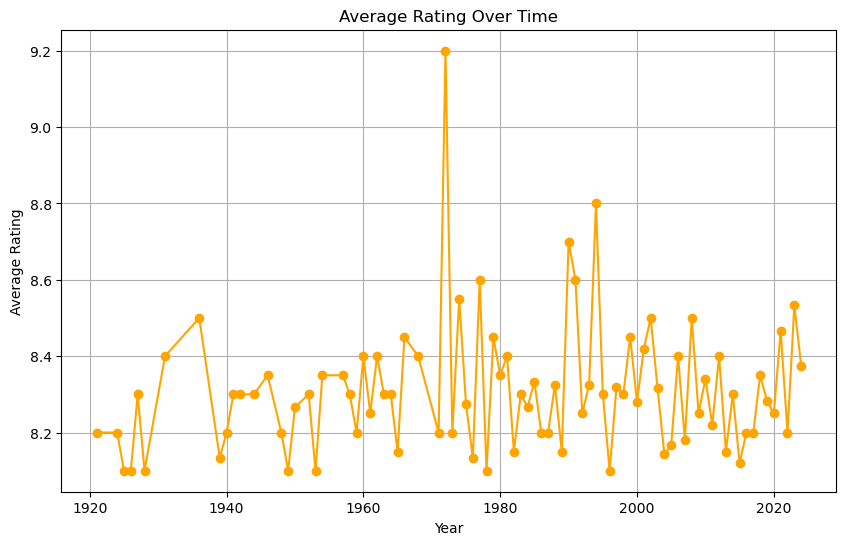

In [28]:
# Group by year and calculate average rating
rating_over_time = df.groupby('year')['rating'].mean()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(rating_over_time.index, rating_over_time.values, marker='o', color='orange')
plt.title('Average Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

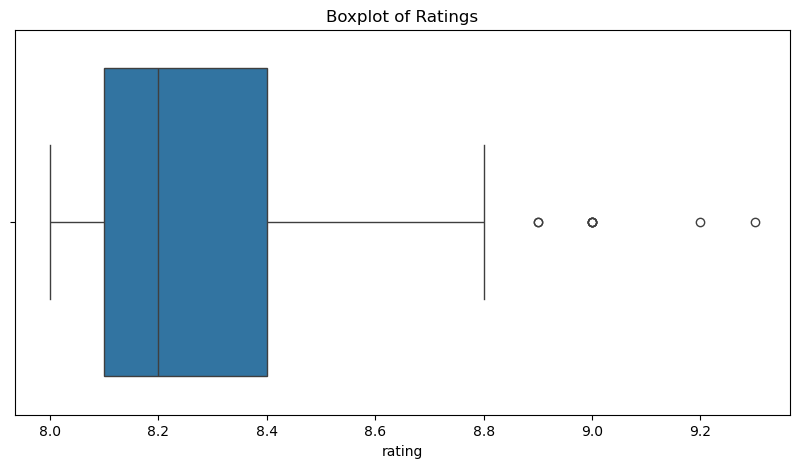

In [32]:
# Boxplot for Ratings
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["rating"])
plt.title("Boxplot of Ratings")
plt.show()

In [24]:
# ## Outliers Detection
# Define outlier thresholds using Interquartile Range (IQR)
Q1_revenue = df["revenue"].quantile(0.25)
Q3_revenue = df["revenue"].quantile(0.75)
IQR_revenue = Q3_revenue - Q1_revenue

Q1_rating = df["rating"].quantile(0.25)
Q3_rating = df["rating"].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating

# Outlier conditions
revenue_outliers = df[(df["revenue"] < (Q1_revenue - 1.5 * IQR_revenue)) | (df["revenue"] > (Q3_revenue + 1.5 * IQR_revenue))]
rating_outliers = df[(df["rating"] < (Q1_rating - 1.5 * IQR_rating)) | (df["rating"] > (Q3_rating + 1.5 * IQR_rating))]

# Display all outliers in the dataset
print("Outliers in Rating:")
print(rating_outliers)
print("Outliers in Revenue:")
print(revenue_outliers)

Outliers in Rating:
                                               title  year  rating  \
0                           The Shawshank Redemption  1994     9.3   
1                                      The Godfather  1972     9.2   
2                                    The Dark Knight  2008     9.0   
3                              The Godfather Part II  1974     9.0   
4                                       12 Angry Men  1957     9.0   
5      The Lord of the Rings: The Return of the King  2003     9.0   
6                                   Schindler's List  1993     9.0   
7                                       Pulp Fiction  1994     8.9   
8  The Lord of the Rings: The Fellowship of the Ring  2001     8.9   

                                               genre  \
0            Epic, Period Drama, Prison Drama, Drama   
1              Epic, Gangster, Tragedy, Crime, Drama   
2  Action Epic, Epic, Superhero, Tragedy, Action,...   
3              Epic, Gangster, Tragedy, Crime, Drama   

Correlation between Revenue and Ratings: 0.16844562448790468


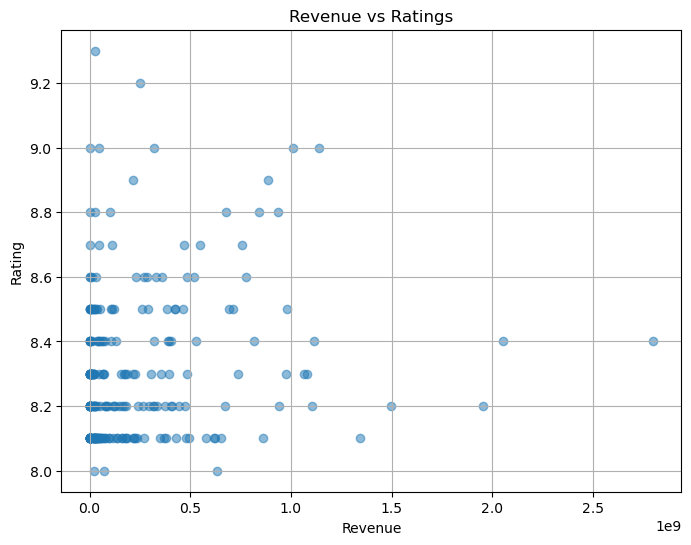

In [33]:
# Calculate correlation between revenue and ratings
correlation = df['revenue'].corr(df['rating'])
print(f"Correlation between Revenue and Ratings: {correlation}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(df['revenue'], df['rating'], alpha=0.5)
plt.title('Revenue vs Ratings')
plt.xlabel('Revenue')
plt.ylabel('Rating')
plt.grid(True)
plt.show()